In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import cv2

In [2]:
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
filename = 'lenna.png'
urllib.request.urlretrieve(url, filename)


('lenna.png', <http.client.HTTPMessage at 0x7eec18259d10>)

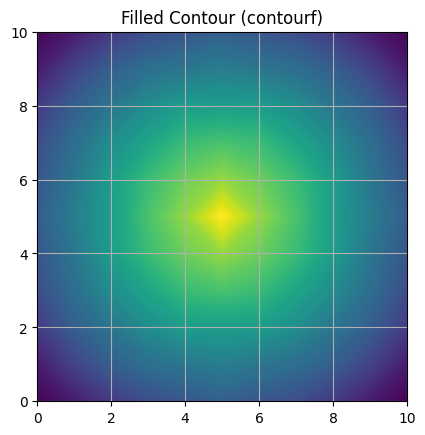

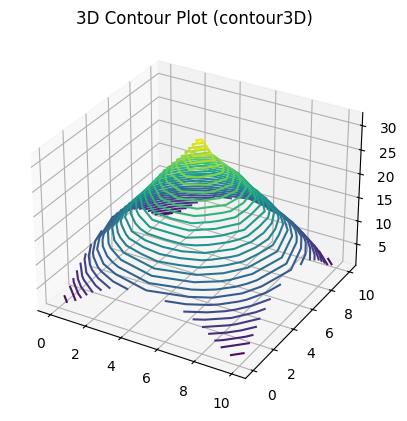

[[ 1  3  6  8  9 10  9  8  6  3  1]
 [ 3  7 10 12 13 14 13 12 10  7  3]
 [ 6 10 13 16 18 18 18 16 13 10  6]
 [ 8 12 16 19 22 23 22 19 16 12  8]
 [ 9 13 18 22 25 27 25 22 18 13  9]
 [10 14 18 23 27 32 27 23 18 14 10]
 [ 9 13 18 22 25 27 25 22 18 13  9]
 [ 8 12 16 19 22 23 22 19 16 12  8]
 [ 6 10 13 16 18 18 18 16 13 10  6]
 [ 3  7 10 12 13 14 13 12 10  7  3]
 [ 1  3  6  8  9 10  9  8  6  3  1]]
1596


In [7]:

value_center = 32;

# size = 3;
size = 11
# size = 100

a = np.zeros((size, size))

center = (np.ceil(size/2) - 1).astype(int)

for x in range(0, size):
  for y in range(0, size):
    radius = np.sqrt((x-center)**2 + (y-center)**2)
    if (x == 0) and (y == 0):
      radiusmax = radius;
    a[x, y] = value_center - (radius/radiusmax) * (value_center-1);

a = (a/a[center, center] * value_center).astype(int)

# Plot 2D filled contour
plt.figure(1)
plt.contourf(a, levels=100, cmap='viridis')
plt.axis('square')
plt.grid(True)
plt.title('Filled Contour (contourf)')

# Plot 3D contour
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(np.arange(size), np.arange(size))

fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, a, levels=30, cmap='viridis')
ax.set_title('3D Contour Plot (contour3D)')
plt.grid(True)

plt.show()

print(a);
print(np.sum(a))



uint8


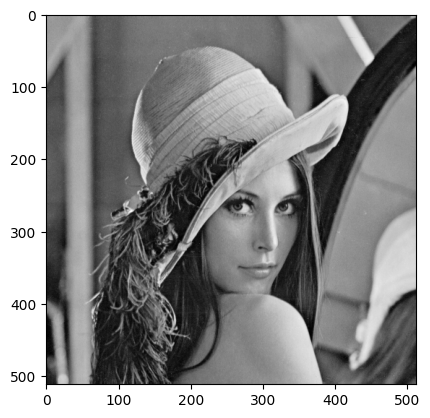

In [4]:
# Load the image using OpenCV (in color)
img = cv2.imread(filename)
print(img.dtype)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert from BGR to RGB

plt.imshow(img_rgb, cmap='gray')

float32


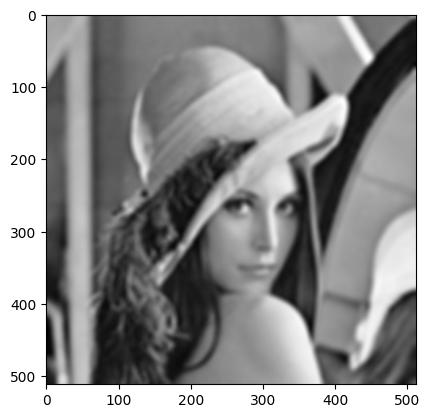

In [9]:
a_normalized = (a*5/8192).astype(np.float32)
print(a_normalized.dtype)
filtered = cv2.filter2D(src=img_rgb, ddepth=-1, kernel=a_normalized)

plt.imshow(filtered, cmap='gray')
